# Mushroom Classification -Safe to eat or deadly poison?-

[Kaggle](https://www.kaggle.com/uciml/mushroom-classification)  


In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns


In [4]:
%config InlineBackend.figure_formats = {'png', 'retina'}
pd.set_option("display.max_rows", 10)

In [157]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [5]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [11]:
np.shape(df)

(8124, 23)

In [12]:
print(df.isnull().sum().values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [14]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [50]:
df2 = pd.get_dummies(df.iloc[:, :5])
df2

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [82]:
y = df2.iloc[:,0].values
X = df2.iloc[:,2:].values
c_name = df2.columns


In [190]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [191]:
len(X_train)

4062

## Decision Tree

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
tree.fit(np.array(X_train), np.array(y_train))
print(metrics.confusion_matrix(y_train,tree.predict(X_train)))
print(metrics.confusion_matrix(y_test,tree.predict(X_test)))

print(np.round(tree.score(X_train, y_train),3)*100)
print(np.round(tree.score(X_test, y_test),3)*100)

[[1407  557]
 [ 126 1972]]
[[1421  531]
 [ 138 1972]]
83.2
83.5


In [220]:
train_score_rlt=[]
test_score_rlt=[]
for i in range(20):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(np.array(X_train), np.array(y_train))
    train_score_rlt.append(np.round(tree.score(X_train, y_train),3)*100)
    test_score_rlt.append(np.round(tree.score(X_test, y_test),3)*100)
    print("Training score:", np.round(tree.score(X_train, y_train),3)*100,",", "Test score:", np.round(tree.score(X_test, y_test),3)*100)

Training score: 73.9 , Test score: 74.9
Training score: 75.0 , Test score: 74.7
Training score: 78.2 , Test score: 77.7
Training score: 82.5 , Test score: 82.7
Training score: 83.2 , Test score: 83.5
Training score: 84.1 , Test score: 84.1
Training score: 84.9 , Test score: 85.5
Training score: 85.2 , Test score: 85.2
Training score: 85.4 , Test score: 85.3
Training score: 85.6 , Test score: 86.4
Training score: 87.2 , Test score: 87.3
Training score: 89.6 , Test score: 89.4
Training score: 89.6 , Test score: 89.4
Training score: 89.6 , Test score: 89.4
Training score: 89.6 , Test score: 89.4
Training score: 89.6 , Test score: 89.4
Training score: 89.6 , Test score: 89.4
Training score: 89.6 , Test score: 89.4
Training score: 89.6 , Test score: 89.4
Training score: 89.6 , Test score: 89.4


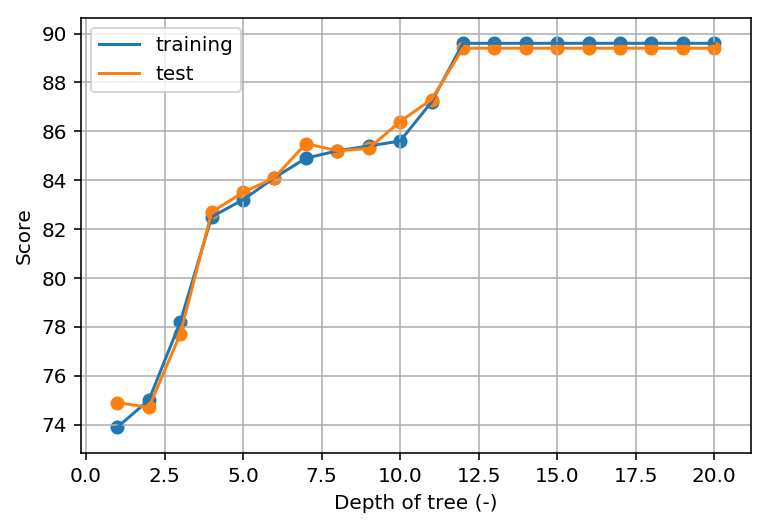

In [221]:
plt.plot((np.arange(20)+1), train_score_rlt, color = new_colors[0], label ='training')
plt.scatter((np.arange(20)+1), train_score_rlt, color = new_colors[0])
plt.plot((np.arange(20)+1), test_score_rlt, color = new_colors[1], label ='test')
plt.scatter((np.arange(20)+1), test_score_rlt, color = new_colors[1])
plt.grid()
plt.xlabel('Depth of tree (-)')
plt.ylabel('Score')
plt.legend()
plt.show()

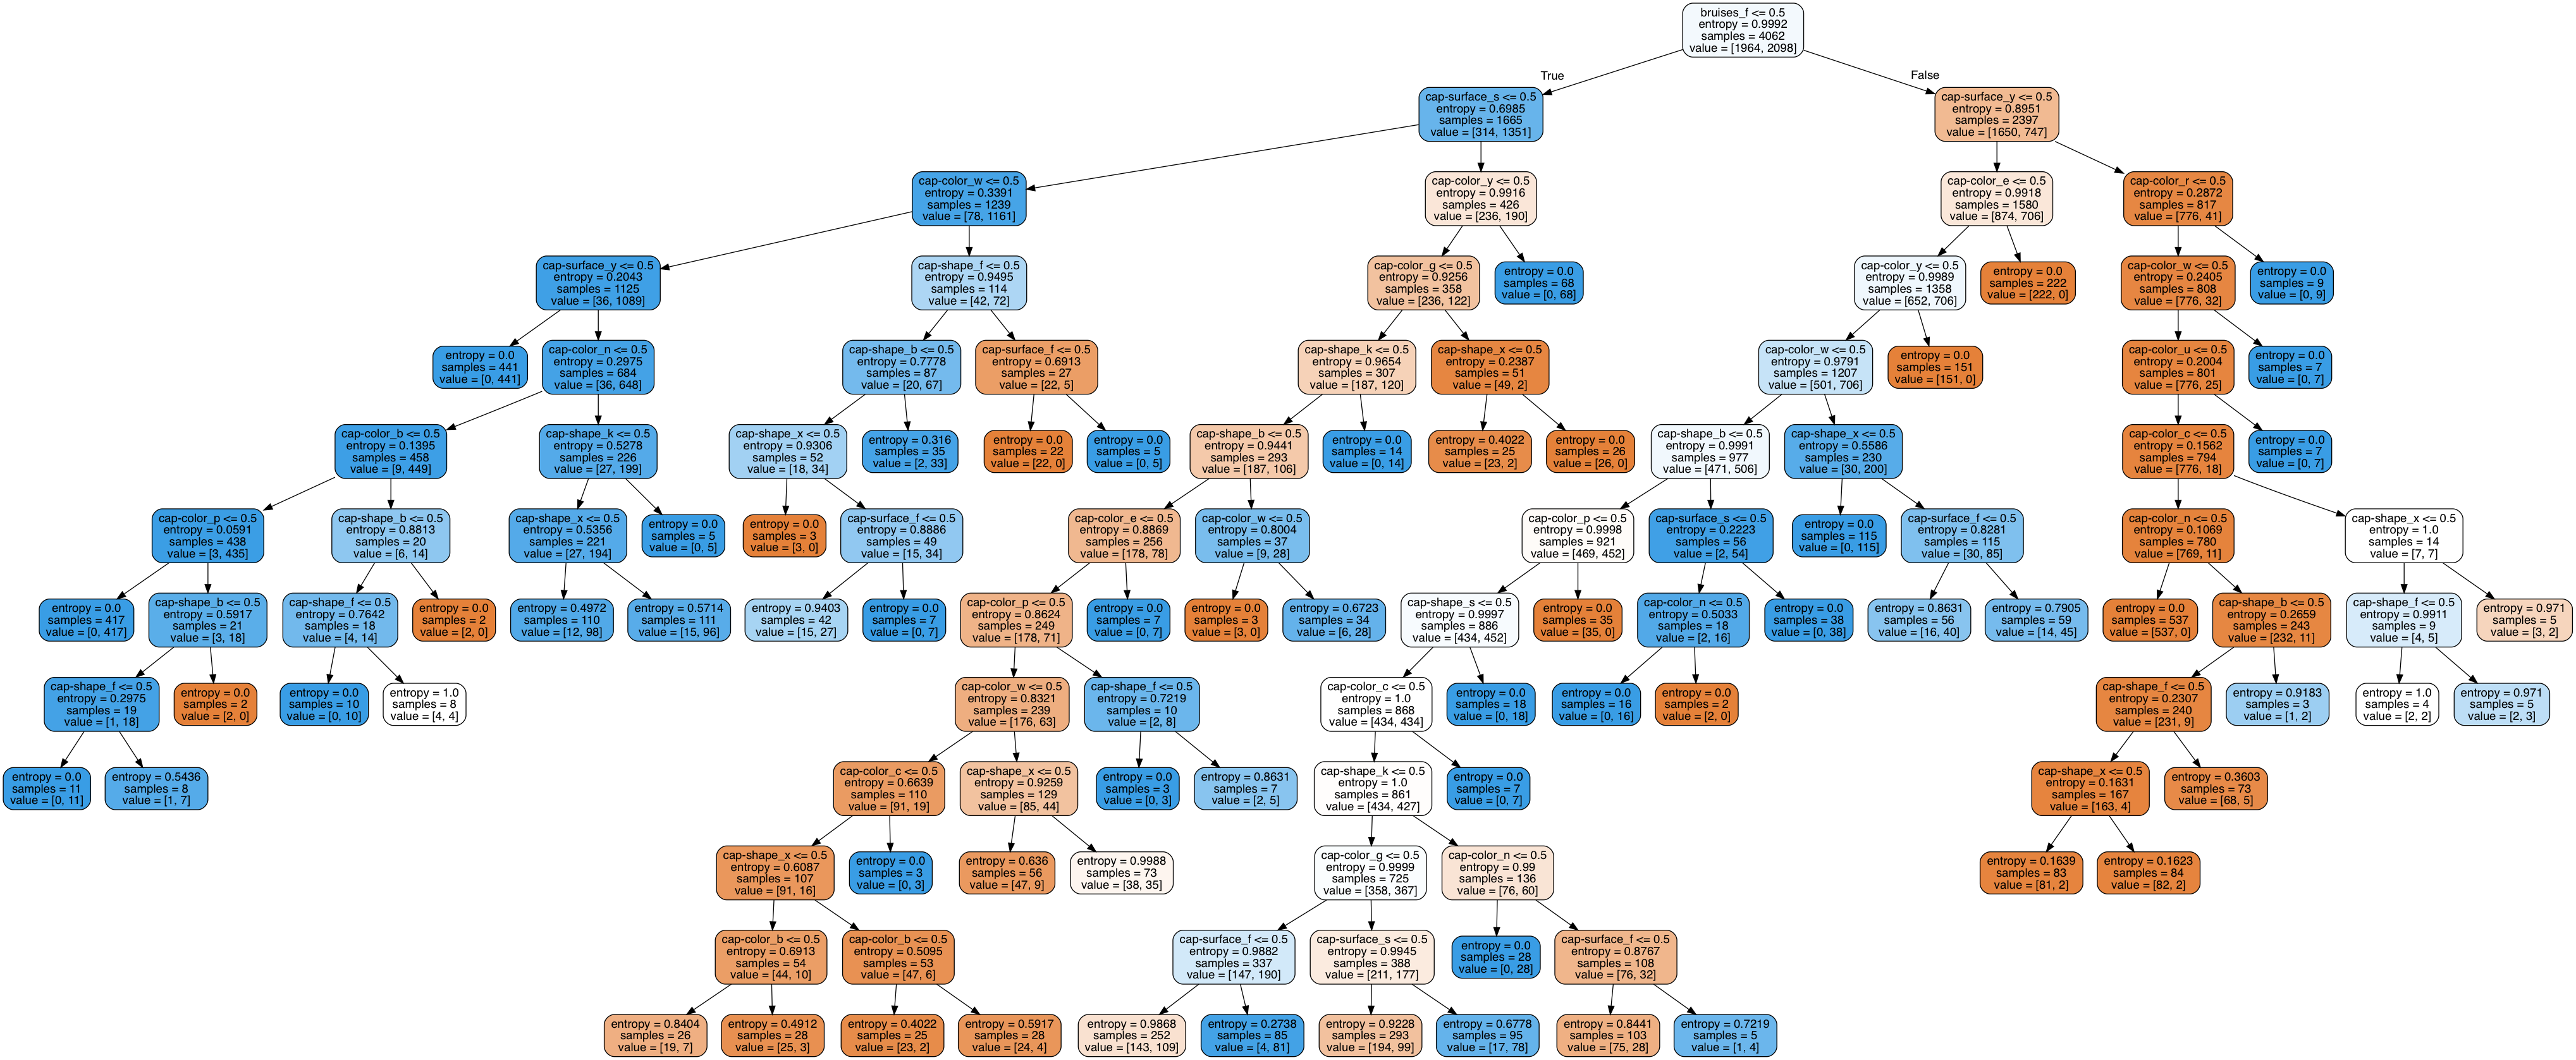

In [222]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
tree = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)
tree.fit(np.array(X_train), np.array(y_train))

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True,rounded=True,feature_names=c_name[2:])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

## Logistic regression

In [259]:
from Plot_decision_regions import PlotDecisionRegions 
plot_decision_regions = PlotDecisionRegions.plot_decision_regions

In [260]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [261]:
print("Training score:", np.round(lr.score(X_train, y_train),3)*100,",", "Test score:",  np.round(lr.score(X_test, y_test),3)*100)

Training score: 80.7 , Test score: 81.1


In [262]:
from sklearn import metrics
y_pred= lr.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[1578,  374],
       [ 395, 1715]])

In [272]:
train_score_rlt=[]
test_score_rlt=[]
for i in np.logspace(1, 10, 20, base=2):
    lr = LogisticRegression(C=i, random_state=0)
    lr.fit(np.array(X_train), np.array(y_train))
    train_score_rlt.append(np.round(lr.score(X_train, y_train),3)*100)
    test_score_rlt.append(np.round(lr.score(X_test, y_test),3)*100)
    print("Training score:", np.round(lr.score(X_train, y_train),3)*100,",", "Test score:", np.round(lr.score(X_test, y_test),3)*100)

Training score: 80.7 , Test score: 81.0
Training score: 80.7 , Test score: 81.0
Training score: 80.7 , Test score: 81.0
Training score: 80.7 , Test score: 81.0
Training score: 80.7 , Test score: 81.0
Training score: 80.7 , Test score: 81.0
Training score: 80.7 , Test score: 81.0
Training score: 80.7 , Test score: 81.0
Training score: 80.7 , Test score: 81.0
Training score: 80.7 , Test score: 81.0
Training score: 80.7 , Test score: 81.1
Training score: 80.7 , Test score: 81.1
Training score: 80.7 , Test score: 81.1
Training score: 80.7 , Test score: 81.1
Training score: 80.7 , Test score: 81.1
Training score: 80.7 , Test score: 81.1
Training score: 80.7 , Test score: 81.1
Training score: 80.7 , Test score: 81.1
Training score: 80.7 , Test score: 81.1
Training score: 80.7 , Test score: 81.1


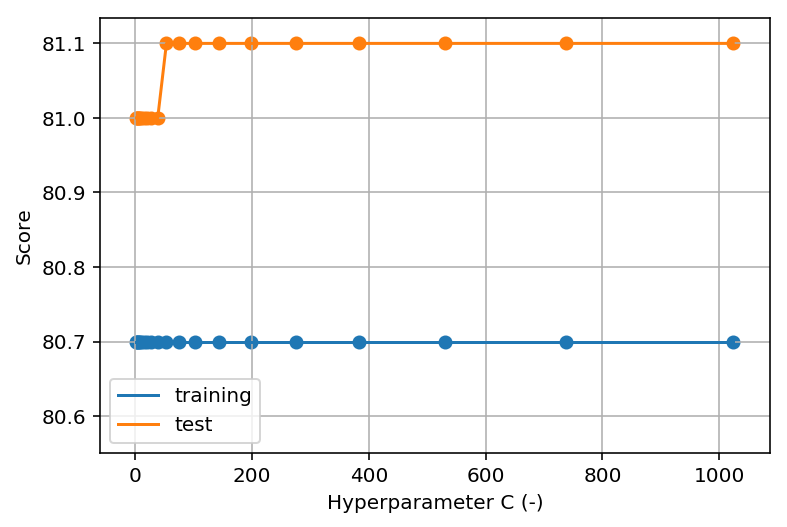

In [273]:
plt.plot(np.logspace(1, 10, 20, base=2), train_score_rlt, color = new_colors[0], label ='training')
plt.scatter(np.logspace(1, 10, 20, base=2), train_score_rlt, color = new_colors[0])
plt.plot(np.logspace(1, 10, 20, base=2), test_score_rlt, color = new_colors[1], label ='test')
plt.scatter(np.logspace(1, 10, 20, base=2), test_score_rlt, color = new_colors[1])
plt.grid()
plt.xlabel('Hyperparameter C (-)')
plt.ylabel('Score')
plt.legend()
plt.show()

## Random Forest

In [274]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [275]:
print(np.round(forest.score(X_test, y_test),3)*100)

89.5


In [276]:
y_pred= forest.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[1826,  126],
       [ 302, 1808]])

In [290]:
train_score_rlt=[]
test_score_rlt=[]
for i in range(20):
    forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=i+1,max_depth=5, random_state=1, n_jobs=2)
    forest.fit(np.array(X_train), np.array(y_train))
    train_score_rlt.append(np.round(forest.score(X_train, y_train),3)*100)
    test_score_rlt.append(np.round(forest.score(X_test, y_test),3)*100)
    print("Number of tree:",i+1,",","Training score:", np.round(forest.score(X_train, y_train),3)*100,",", "Test score:", np.round(forest.score(X_test, y_test),3)*100)

Number of tree: 1 , Training score: 76.3 , Test score: 77.0
Number of tree: 2 , Training score: 80.4 , Test score: 80.7
Number of tree: 3 , Training score: 84.4 , Test score: 84.3
Number of tree: 4 , Training score: 83.5 , Test score: 84.1
Number of tree: 5 , Training score: 81.6 , Test score: 83.3
Number of tree: 6 , Training score: 83.8 , Test score: 85.4
Number of tree: 7 , Training score: 84.4 , Test score: 84.2
Number of tree: 8 , Training score: 82.8 , Test score: 83.0
Number of tree: 9 , Training score: 84.1 , Test score: 84.4
Number of tree: 10 , Training score: 84.2 , Test score: 84.4
Number of tree: 11 , Training score: 83.9 , Test score: 84.3
Number of tree: 12 , Training score: 84.3 , Test score: 84.6
Number of tree: 13 , Training score: 83.9 , Test score: 84.2
Number of tree: 14 , Training score: 84.3 , Test score: 84.6
Number of tree: 15 , Training score: 84.4 , Test score: 84.7
Number of tree: 16 , Training score: 84.3 , Test score: 84.5
Number of tree: 17 , Training sco

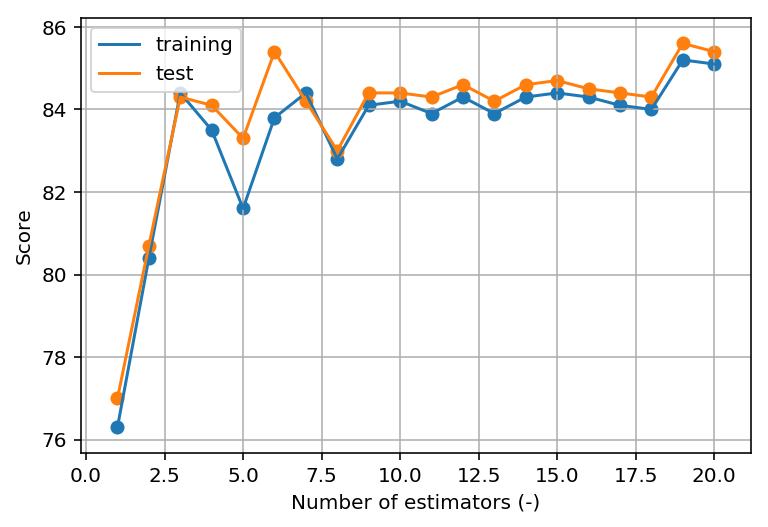

In [291]:
plt.plot((np.arange(20)+1), train_score_rlt, color = new_colors[0], label ='training')
plt.scatter((np.arange(20)+1), train_score_rlt, color = new_colors[0])
plt.plot((np.arange(20)+1), test_score_rlt, color = new_colors[1], label ='test')
plt.scatter((np.arange(20)+1), test_score_rlt, color = new_colors[1])
plt.grid()
plt.xlabel('Number of estimators (-)')
plt.ylabel('Score')
plt.legend()
plt.show()

In [292]:
train_score_rlt=[]
test_score_rlt=[]
for i in range(20):
    forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=i+1,max_depth=10, random_state=1, n_jobs=2)
    forest.fit(np.array(X_train), np.array(y_train))
    train_score_rlt.append(np.round(forest.score(X_train, y_train),3)*100)
    test_score_rlt.append(np.round(forest.score(X_test, y_test),3)*100)
    print("Number of tree:",i+1,",","Training score:", np.round(forest.score(X_train, y_train),3)*100,",", "Test score:", np.round(forest.score(X_test, y_test),3)*100)

Number of tree: 1 , Training score: 88.2 , Test score: 88.4
Number of tree: 2 , Training score: 89.0 , Test score: 88.7
Number of tree: 3 , Training score: 89.2 , Test score: 89.2
Number of tree: 4 , Training score: 89.3 , Test score: 89.3
Number of tree: 5 , Training score: 89.3 , Test score: 89.3
Number of tree: 6 , Training score: 89.3 , Test score: 89.3
Number of tree: 7 , Training score: 89.3 , Test score: 89.3
Number of tree: 8 , Training score: 89.4 , Test score: 89.3
Number of tree: 9 , Training score: 89.4 , Test score: 89.3
Number of tree: 10 , Training score: 89.5 , Test score: 89.5
Number of tree: 11 , Training score: 89.5 , Test score: 89.5
Number of tree: 12 , Training score: 89.5 , Test score: 89.5
Number of tree: 13 , Training score: 89.5 , Test score: 89.5
Number of tree: 14 , Training score: 89.5 , Test score: 89.5
Number of tree: 15 , Training score: 89.5 , Test score: 89.5
Number of tree: 16 , Training score: 89.5 , Test score: 89.4
Number of tree: 17 , Training sco

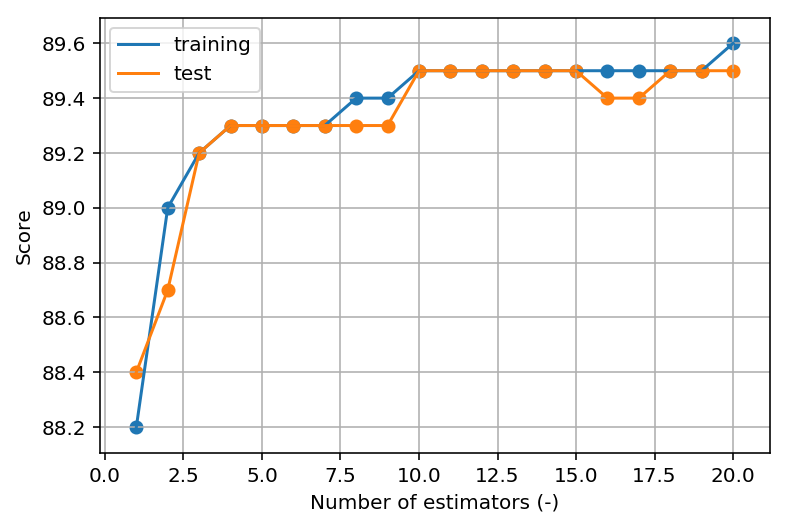

In [293]:
plt.plot((np.arange(20)+1), train_score_rlt, color = new_colors[0], label ='training')
plt.scatter((np.arange(20)+1), train_score_rlt, color = new_colors[0])
plt.plot((np.arange(20)+1), test_score_rlt, color = new_colors[1], label ='test')
plt.scatter((np.arange(20)+1), test_score_rlt, color = new_colors[1])
plt.grid()
plt.xlabel('Number of estimators (-)')
plt.ylabel('Score')
plt.legend()
plt.show()

In [294]:
train_score_rlt=[]
test_score_rlt=[]
for i in range(20):
    forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=i+1,max_depth=15, random_state=1, n_jobs=2)
    forest.fit(np.array(X_train), np.array(y_train))
    train_score_rlt.append(np.round(forest.score(X_train, y_train),3)*100)
    test_score_rlt.append(np.round(forest.score(X_test, y_test),3)*100)
    print("Number of tree:",i+1,",","Training score:", np.round(forest.score(X_train, y_train),3)*100,",", "Test score:", np.round(forest.score(X_test, y_test),3)*100)

Number of tree: 1 , Training score: 89.5 , Test score: 89.5
Number of tree: 2 , Training score: 89.4 , Test score: 88.9
Number of tree: 3 , Training score: 89.5 , Test score: 89.3
Number of tree: 4 , Training score: 89.6 , Test score: 89.4
Number of tree: 5 , Training score: 89.6 , Test score: 89.4
Number of tree: 6 , Training score: 89.6 , Test score: 89.4
Number of tree: 7 , Training score: 89.6 , Test score: 89.4
Number of tree: 8 , Training score: 89.5 , Test score: 89.5
Number of tree: 9 , Training score: 89.5 , Test score: 89.5
Number of tree: 10 , Training score: 89.5 , Test score: 89.5
Number of tree: 11 , Training score: 89.5 , Test score: 89.5
Number of tree: 12 , Training score: 89.5 , Test score: 89.5
Number of tree: 13 , Training score: 89.5 , Test score: 89.5
Number of tree: 14 , Training score: 89.5 , Test score: 89.5
Number of tree: 15 , Training score: 89.6 , Test score: 89.4
Number of tree: 16 , Training score: 89.6 , Test score: 89.4
Number of tree: 17 , Training sco

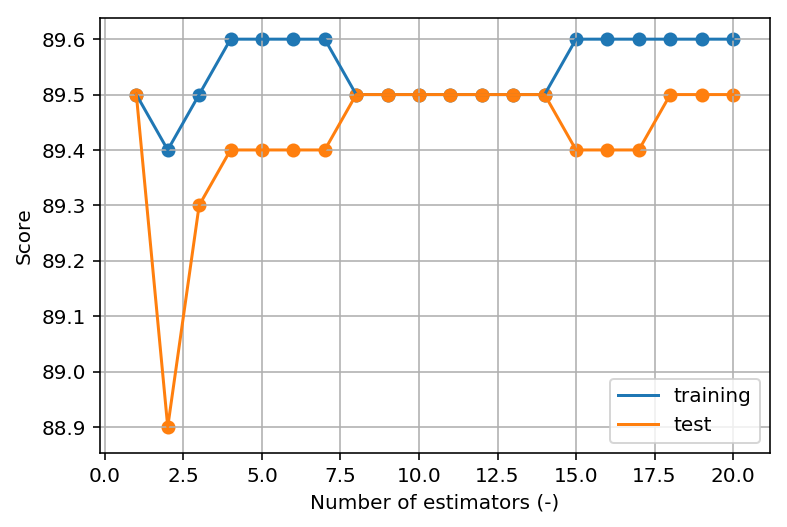

In [295]:
plt.plot((np.arange(20)+1), train_score_rlt, color = new_colors[0], label ='training')
plt.scatter((np.arange(20)+1), train_score_rlt, color = new_colors[0])
plt.plot((np.arange(20)+1), test_score_rlt, color = new_colors[1], label ='test')
plt.scatter((np.arange(20)+1), test_score_rlt, color = new_colors[1])
plt.grid()
plt.xlabel('Number of estimators (-)')
plt.ylabel('Score')
plt.legend()
plt.show()

In [296]:
train_score_rlt=[]
test_score_rlt=[]
for i in range(20):
    forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=i+1,max_depth=20, random_state=1, n_jobs=2)
    forest.fit(np.array(X_train), np.array(y_train))
    train_score_rlt.append(np.round(forest.score(X_train, y_train),3)*100)
    test_score_rlt.append(np.round(forest.score(X_test, y_test),3)*100)
    print("Number of tree:",i+1,",","Training score:", np.round(forest.score(X_train, y_train),3)*100,",", "Test score:", np.round(forest.score(X_test, y_test),3)*100)

Number of tree: 1 , Training score: 89.5 , Test score: 89.3
Number of tree: 2 , Training score: 89.4 , Test score: 88.9
Number of tree: 3 , Training score: 89.5 , Test score: 89.3
Number of tree: 4 , Training score: 89.6 , Test score: 89.4
Number of tree: 5 , Training score: 89.6 , Test score: 89.3
Number of tree: 6 , Training score: 89.6 , Test score: 89.4
Number of tree: 7 , Training score: 89.6 , Test score: 89.4
Number of tree: 8 , Training score: 89.5 , Test score: 89.5
Number of tree: 9 , Training score: 89.5 , Test score: 89.5
Number of tree: 10 , Training score: 89.5 , Test score: 89.5
Number of tree: 11 , Training score: 89.5 , Test score: 89.5
Number of tree: 12 , Training score: 89.5 , Test score: 89.5
Number of tree: 13 , Training score: 89.5 , Test score: 89.5
Number of tree: 14 , Training score: 89.5 , Test score: 89.5
Number of tree: 15 , Training score: 89.6 , Test score: 89.4
Number of tree: 16 , Training score: 89.6 , Test score: 89.4
Number of tree: 17 , Training sco

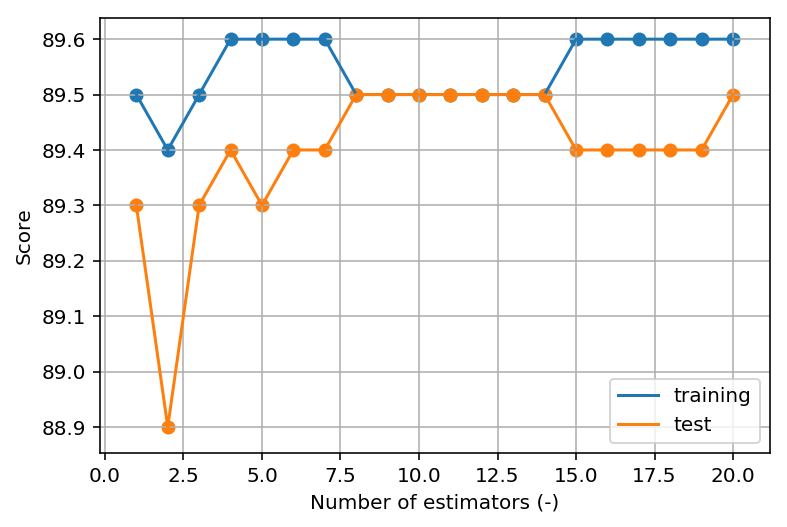

In [297]:
plt.plot((np.arange(20)+1), train_score_rlt, color = new_colors[0], label ='training')
plt.scatter((np.arange(20)+1), train_score_rlt, color = new_colors[0])
plt.plot((np.arange(20)+1), test_score_rlt, color = new_colors[1], label ='test')
plt.scatter((np.arange(20)+1), test_score_rlt, color = new_colors[1])
plt.grid()
plt.xlabel('Number of estimators (-)')
plt.ylabel('Score')
plt.legend()
plt.show()

## Comparison between classifiers

In [298]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)
tree.fit(np.array(X_train), np.array(y_train))
print("DecisionTree:", "Training:", np.round(tree.score(X_train, y_train),3)*100, ", Test:", np.round(tree.score(X_test, y_test),3)*100)

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train, y_train)
print("Logistic regression:", "Training:", np.round(lr.score(X_train, y_train),3)*100, ", Test:", np.round(lr.score(X_test, y_test),3)*100)

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10,max_depth=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
print("Random Forest:", "Training:", np.round(forest.score(X_train, y_train),3)*100, ", Test:", np.round(forest.score(X_test, y_test),3)*100)



DecisionTree: Training: 89.6 , Test: 89.4
Logistic regression: Training: 80.7 , Test: 81.1
Random Forest: Training: 89.5 , Test: 89.5
